In [27]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import os
import pyqae as pq

from pyqae.sitk import show_itk_image, show_itk_image3d

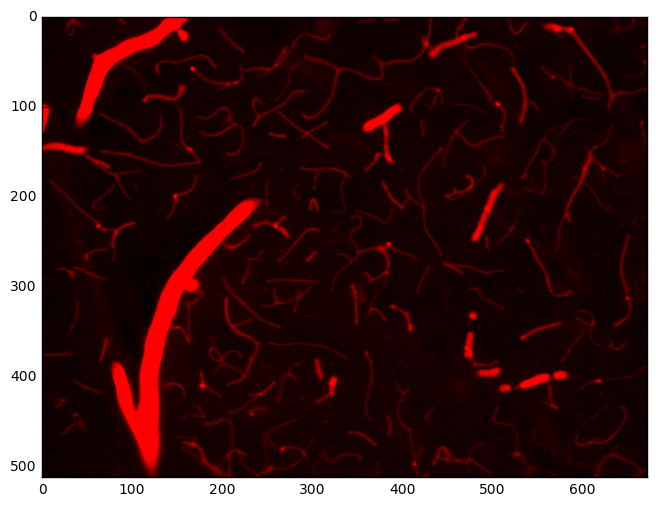

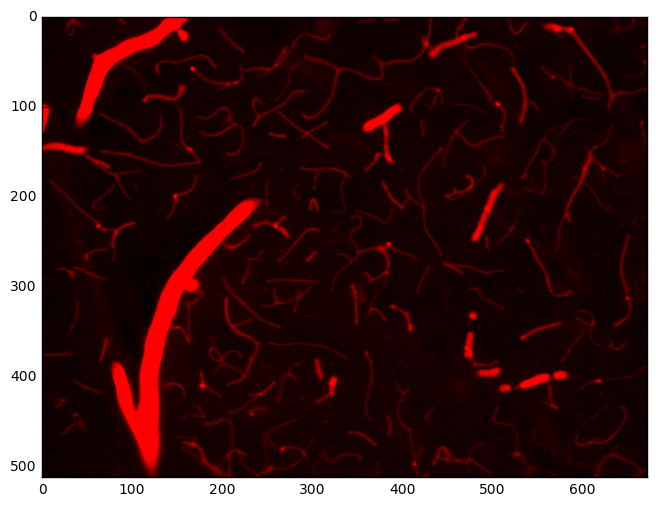

In [9]:
img = sitk.ReadImage(os.path.join("..", "data", "confocal_stack.tif"))
show_itk_image(img)

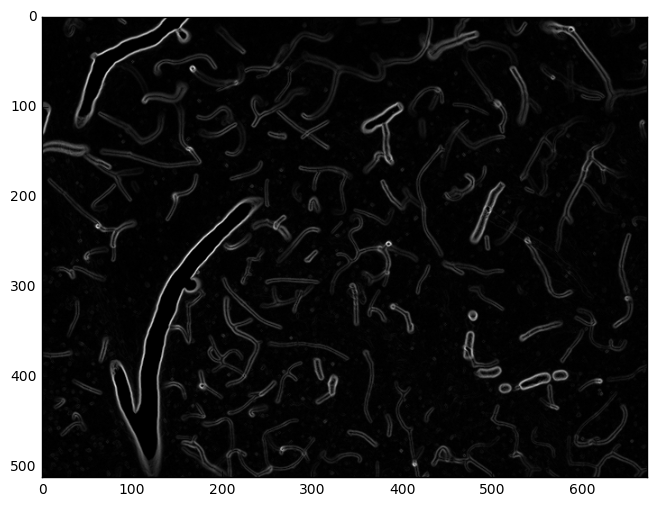

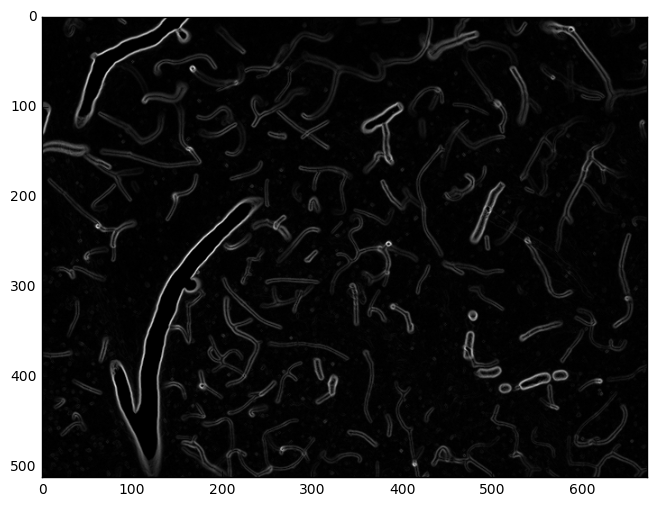

In [10]:
arr_float = sitk.GetArrayFromImage(img).astype(np.float32)
print(arr_float.shape)
img_float = sitk.GetImageFromArray(np.mean(arr_float, 3))
feature_img = sitk.GradientMagnitude(img_float)
show_itk_image(feature_img)

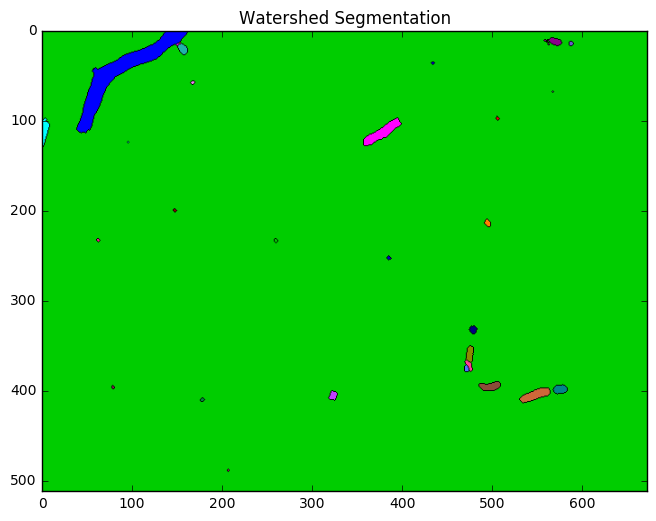

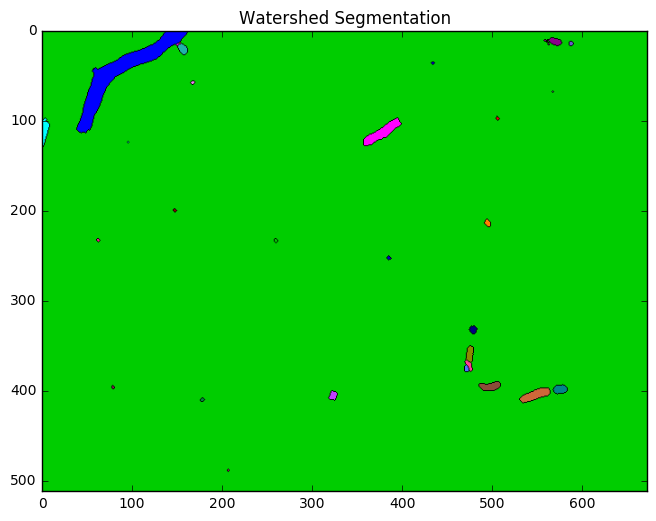

In [11]:
sitk.LabelToRGB(ws_img)
ws_img = sitk.MorphologicalWatershed(feature_img, level=4, 
                                     markWatershedLine=True, 
                                     fullyConnected=False)
show_itk_image(sitk.LabelToRGB(ws_img), "Watershed Segmentation")


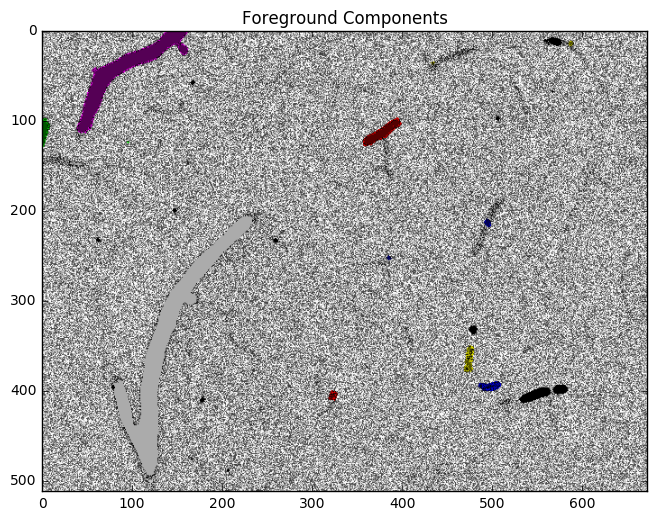

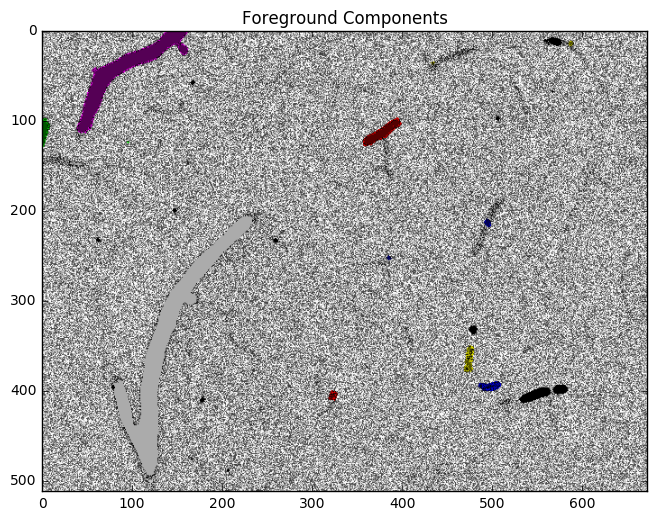

In [12]:
seg = sitk.ConnectedComponent(ws_img!=ws_img[0,0,0])
show_itk_image(sitk.LabelOverlay(img_float, seg), "Foreground Components")

In [17]:
from glob import glob
import os
cpath = "/Users/mader/Dropbox/4Quant/Projects/TumorSegmentation/10092825/0008_ep2d_diff_3scan_trace_8B_value"
in_img = sitk.ReadImage(glob(os.path.join(cpath, "*.dcm")))

In [19]:
in_img.GetDimension()

3

In [22]:
in_img.GetSpacing()

(2.0, 2.0, 4.999996185302734)

In [24]:
in_img.GetNumberOfComponentsPerPixel()

1

In [30]:
epdiff = sitk.GetArrayFromImage(in_img)
print(epdiff.shape)

(240, 130, 130)


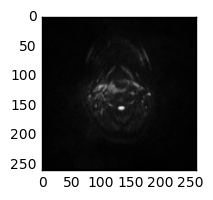

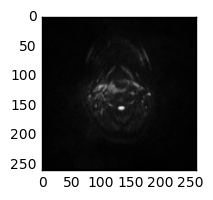

In [29]:
show_itk_image(in_img)